# Визуализация данных в python

Для того, чтобы поулчить данные, визуализровать их - нужны библиотеки. 

Их можно подклучить с помощью специальной команды `import`. Например:

In [1]:
import pandas as pd  # библиотека для работы с данными
import matplotlib.pyplot as plt  # библиотека для рисования 

## Простой график

Начнём с самых простых графиков и тех функций языка `Python`, которые вы знаете.

#### Генерируем набор данных

In [2]:
data = range(10)
print(data)

range(0, 10)


#### Строим график с помощью команды plot

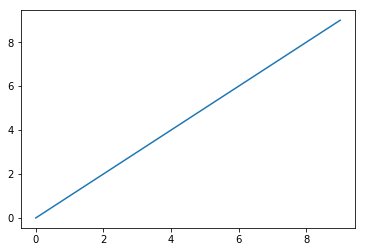

In [3]:
plt.plot(data)

## Настройка внешнего вида графика

#### Тип и цвет линии

Можно посомтреть через справку ,выполнив следующую команду

In [4]:
?plt.plot

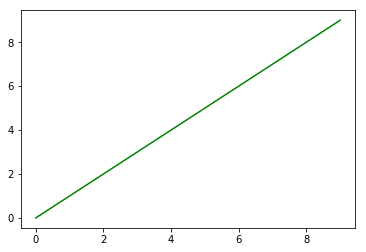

In [5]:
plt.plot(data, color = 'g')

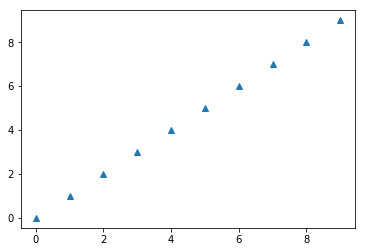

In [6]:
plt.plot(data, '^')

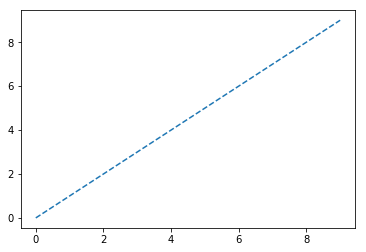

In [7]:
plt.plot(data, '--')

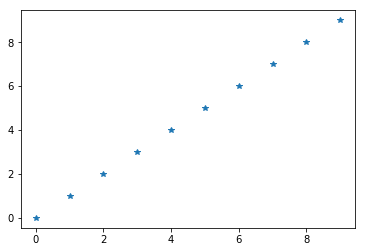

In [8]:
plt.plot(data, '*')

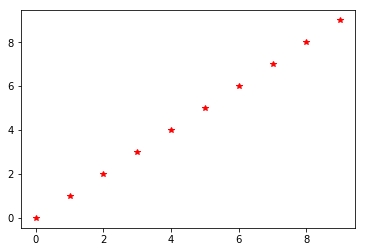

In [9]:
plt.plot(data, 'r*')

#### Задаем размер графика

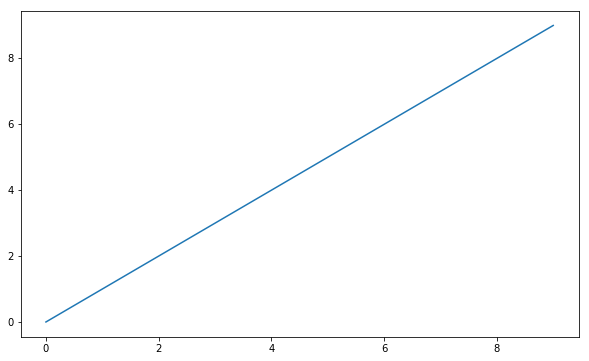

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(data)

#### Добавляем сетку

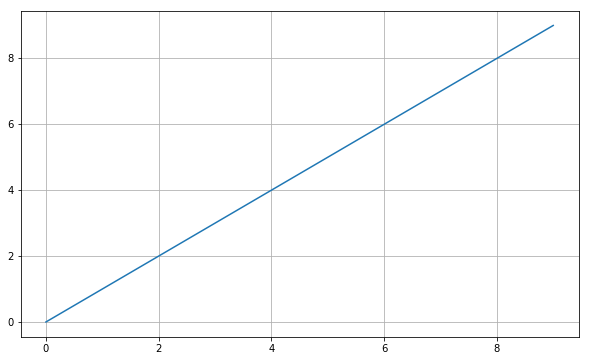

In [11]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(data)

#### Добавляем название графика

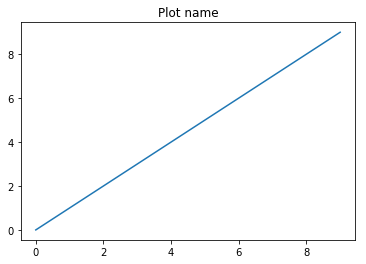

In [12]:
plt.title('Plot name')
plt.plot(data)

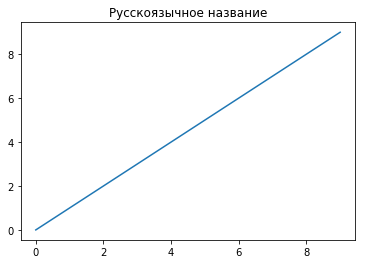

In [13]:
#не будет работать!
plt.title('Русскоязычное название')
plt.plot(data)

/home/ivan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


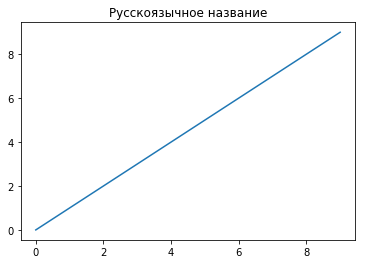

In [14]:
plt.title(u'Русскоязычное название', family="verdana")
plt.plot(data)

#### Подписи к осям

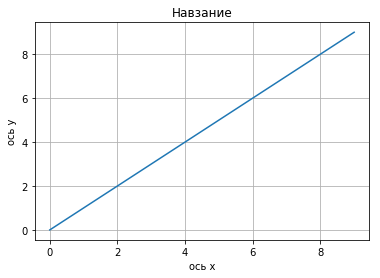

In [15]:
plt.title(u'Навзание', family='verdana')
plt.grid()
plt.xlabel(u'ось x', family='verdana')
plt.ylabel(u'ось y', family='verdana')
plt.plot(data)

#### Подписи на графике

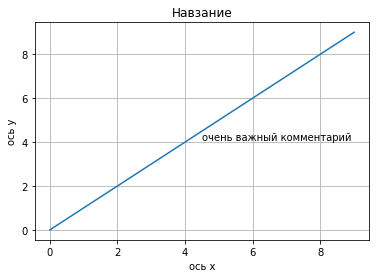

In [16]:
plt.grid()
plt.title(u'Навзание', family='verdana')
plt.xlabel(u'ось x', family='verdana')
plt.ylabel(u'ось y', family='verdana')
plt.text(4.5, 4.1, u'очень важный комментарий', family="verdana")
plt.plot(data)

## Много графиков на одной плоскости

#### Сгенирируем данные

In [17]:
linear = range(10)
nonlinear = [x**2 for x in range(10)]

#### Построим график

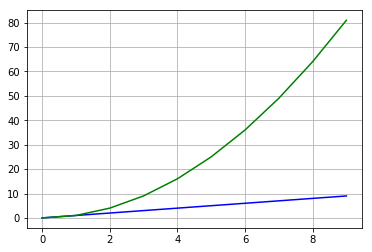

In [18]:
plt.grid()
plt.plot(linear, 'b-')
plt.plot(nonlinear, 'g-')

#### Подписи к осям

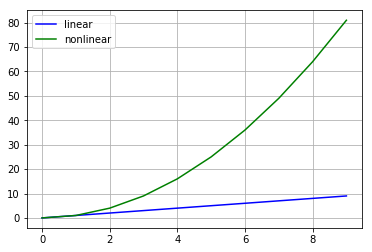

In [19]:
plt.grid()
plt.plot(linear, 'b-')
plt.plot(nonlinear, 'g-')
plt.legend(['linear', 'nonlinear'])

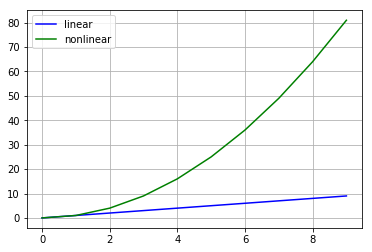

In [20]:
plt.grid()
plt.plot(linear, 'b-')
plt.plot(nonlinear, 'g-')
plt.legend(['linear', 'nonlinear'], loc=2)

## Много графиков на одном изображении

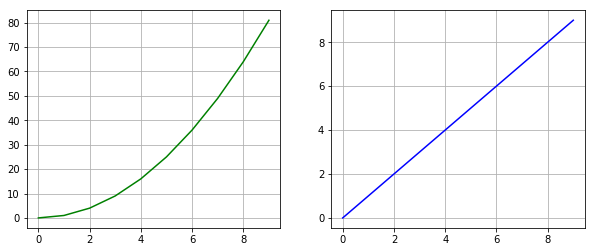

In [21]:
plt.figure(figsize=(10,4))

plt.subplot(122)
plt.grid()
plt.plot(linear, 'b-')

plt.subplot(121)
plt.grid()
plt.plot(nonlinear, 'g-')

## Как сохранить график

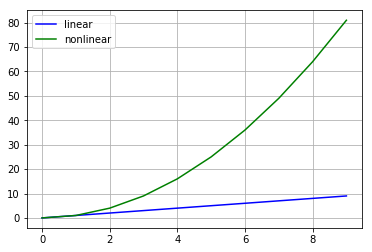

In [22]:
plt.grid()
plt.plot(linear, 'b-')
plt.plot(nonlinear, 'g-')
plt.legend(['linear', 'nonlinear'], loc=2)
plt.savefig('../saved_plot.png')

Мы научились:
   * Строить графики в matplotlib - команда plot();
   * Настраивать внешний вид графика: сетка, подписи, несколькго графиков;
   * Созранять полученне графики в виде изображения для дальнейшего использования.

# Визуализация для анализа данных

## Задача "Ирисы Фишера"

In [23]:
from sklearn import datasets
from pandas import DataFrame

In [24]:
iris = datasets.load_iris()

In [25]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [26]:
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame.target = iris_frame.target.apply(lambda x : iris.target_names[x])

In [27]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd07e50bf60>]],
      dtype=object)

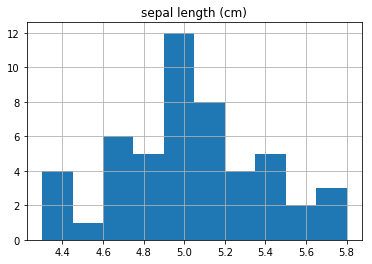

In [28]:
iris_frame[iris_frame.target == 'setosa'].hist('sepal length (cm)')

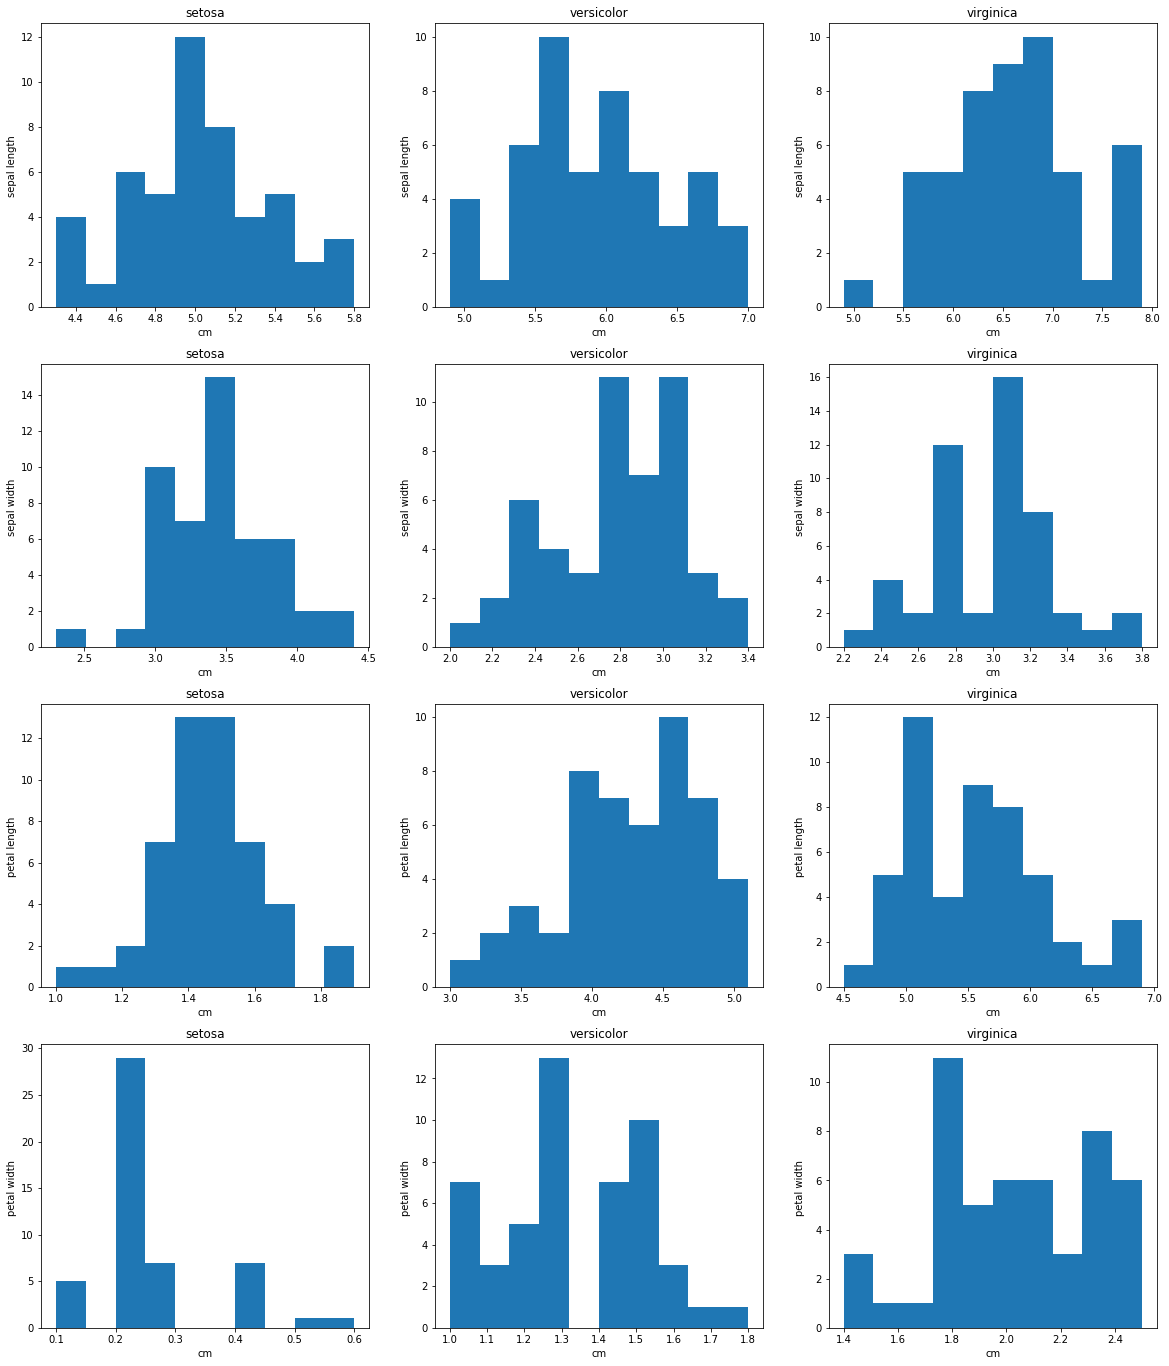

In [29]:
plt.figure(figsize = (20, 24))

plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        plt.subplot(4, 3, plot_number)
        plt.hist(iris_frame[iris_frame.target == target_name][feature_name])
        plt.title(target_name)
        plt.xlabel('cm')
        plt.ylabel(feature_name[:-4])

In [30]:
import seaborn as sns

/home/ivan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


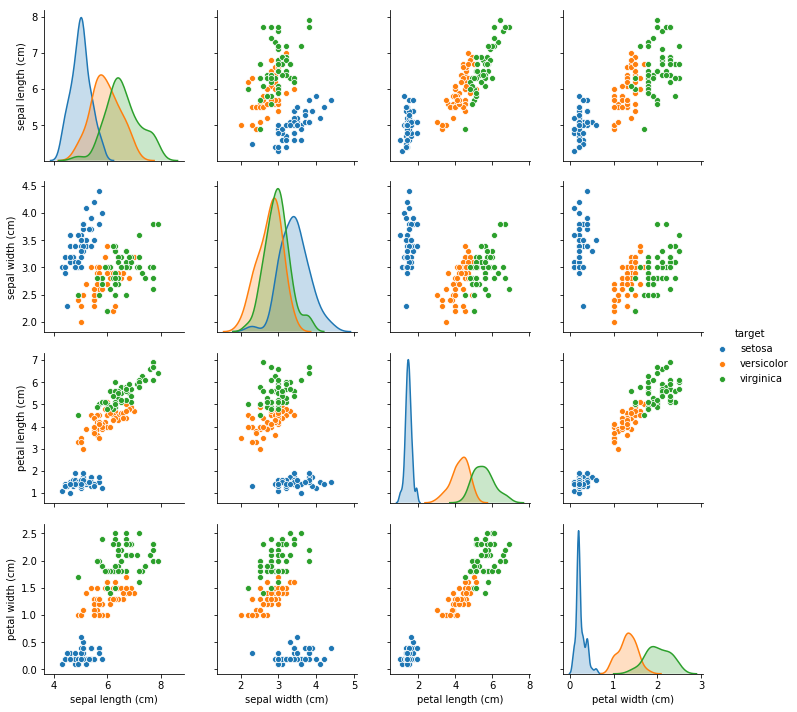

In [31]:
sns.pairplot(iris_frame, hue='target')

## Задача "Handwritten digits"

In [32]:
import numpy as np  # библиотека для математики

In [33]:
digits  =  datasets.load_digits()

In [34]:
data = digits.data[:1000]
labels = digits.target[:1000]

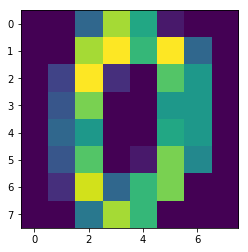

In [35]:
plt.imshow(digits.data[0].reshape(8,8))

In [36]:
digits.target[0]

0

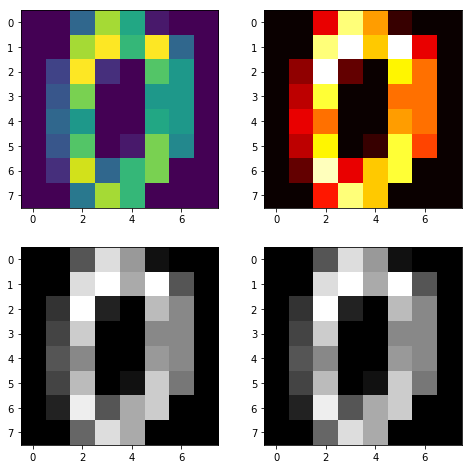

In [37]:
plt.figure(figsize = (8, 8))

plt.subplot(2, 2, 1)
plt.imshow(digits.images[0])

plt.subplot(2, 2, 2)
plt.imshow(digits.images[0], cmap = 'hot')

plt.subplot(2, 2, 3)
plt.imshow(digits.images[0], cmap = 'gray')

plt.subplot(2, 2, 4)
plt.imshow(digits.images[0], cmap = 'gray', interpolation = 'nearest')

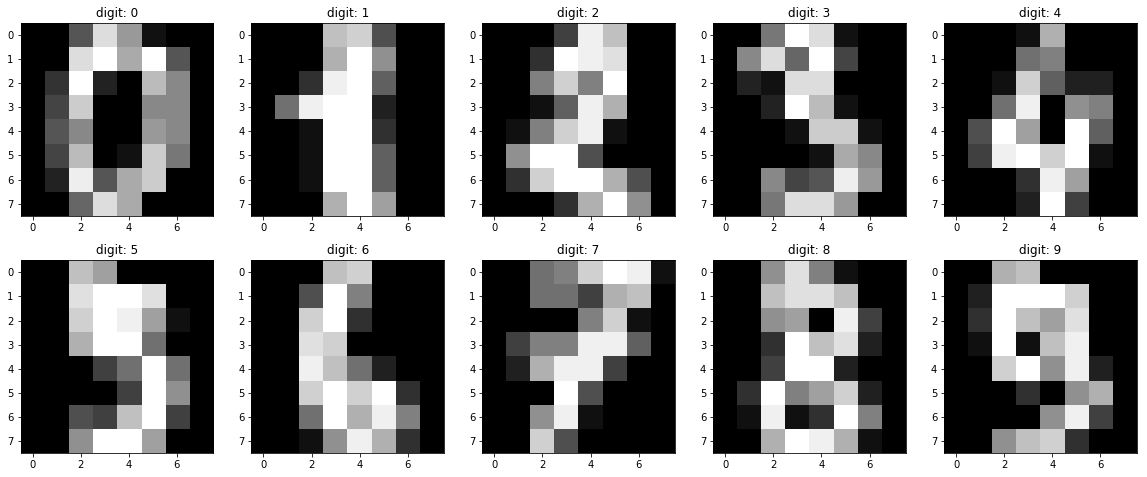

In [38]:
plt.figure(figsize = (20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    plt.subplot(2, 5, plot_number + 1)
    plt.imshow(plot, cmap = 'gray')
    plt.title('digit: ' + str(digits.target[plot_number]))

###  Random projection

In [39]:
from sklearn import random_projection

In [40]:
projection = random_projection.SparseRandomProjection(n_components = 2, random_state = 0)
data_2d_rp = projection.fit_transform(data)

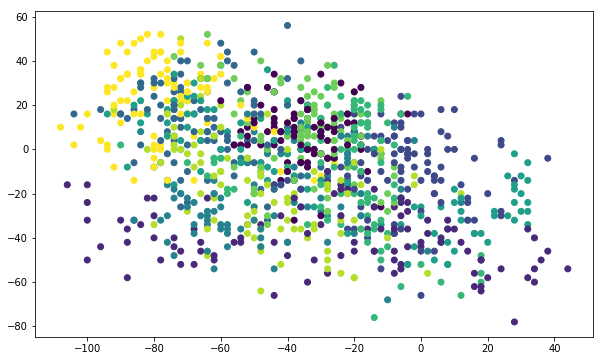

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c = labels)

### t-SNE

In [42]:
from sklearn import manifold

In [43]:
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(data)

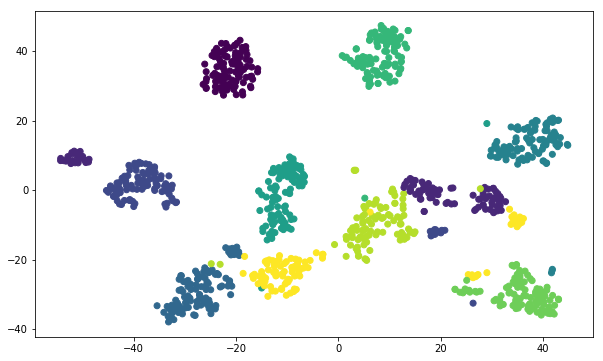

In [44]:
plt.figure(figsize = (10, 6))
plt.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels)